# 1) Chargement des données

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [7]:


DATA_PATH = "data/billets.csv"

if not os.path.exists(DATA_PATH):
    print(f"❌ Attention : le fichier '{DATA_PATH}' n'existe pas.")

try:
    df = pd.read_csv(DATA_PATH, sep=";")
    print("✅ Données chargées :", df.shape)
    display(df.head())
except Exception as e:
    print("❌ Erreur lors du chargement :", e)
    print("⚠️ Tu as bien lu le code avant de l'executer ? 😏")


✅ Données chargées : (1500, 7)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# 2) Analyse exploratoire (EDA)


Là, c'est vous les pro 💪, je vous fais entièrement confiance 😉 !

Pssst (indice) : trouvez des variables corrélées à votre objectif, ça marche mieux 😉.

In [8]:
# Afficher les 5 premières lignes
print("Premières lignes du jeu de données :")
print(df.head())

# Afficher les informations générales (colonnes, types de données, valeurs manquantes)
print("\nInformations sur le jeu de données :")
print(df.info())

# Afficher la répartition des classes (vrai/faux)
print("\nRépartition des classes :")
print(df['is_genuine'].value_counts())


Premières lignes du jeu de données :
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  

Informations sur le jeu de données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 no

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Statistiques descriptives</h3>

In [9]:
# Statistiques descriptives
print("Statistiques descriptives :")
print(df.describe())

Statistiques descriptives :
          diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Visualisation des distributions</h3>

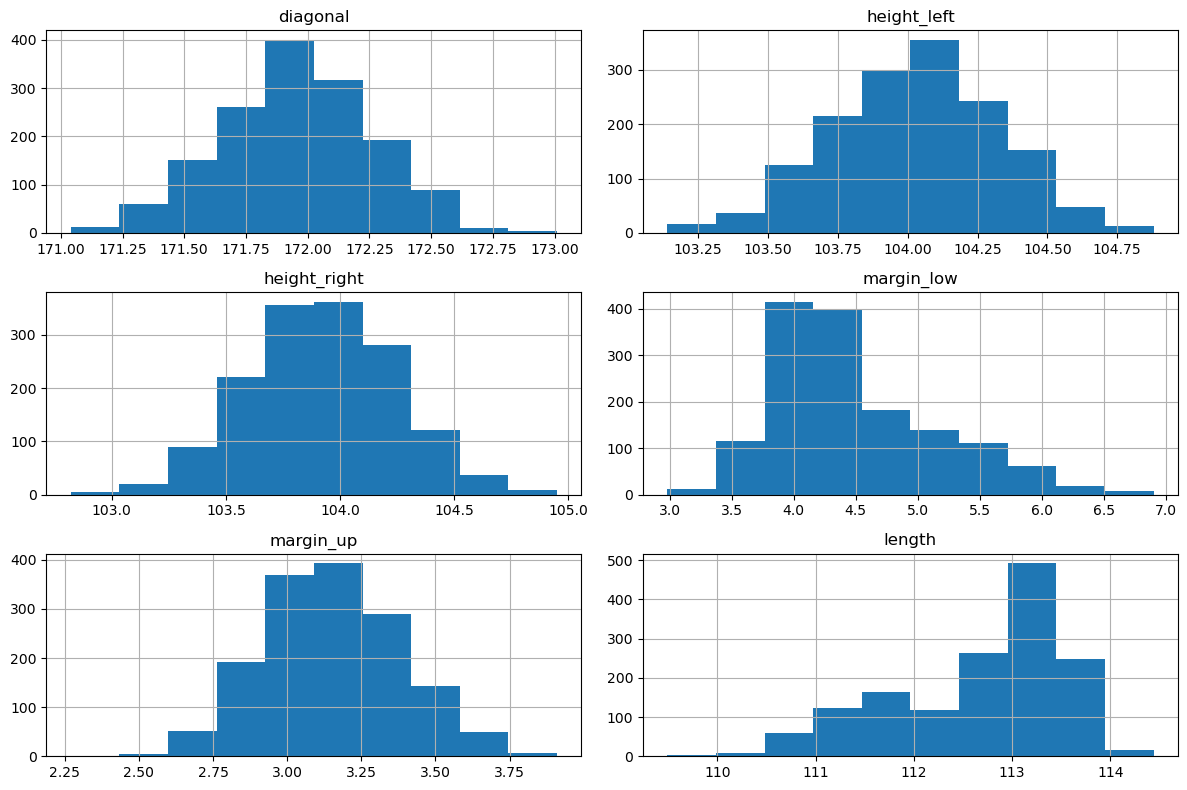

In [10]:
# Histogrammes pour chaque variable
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


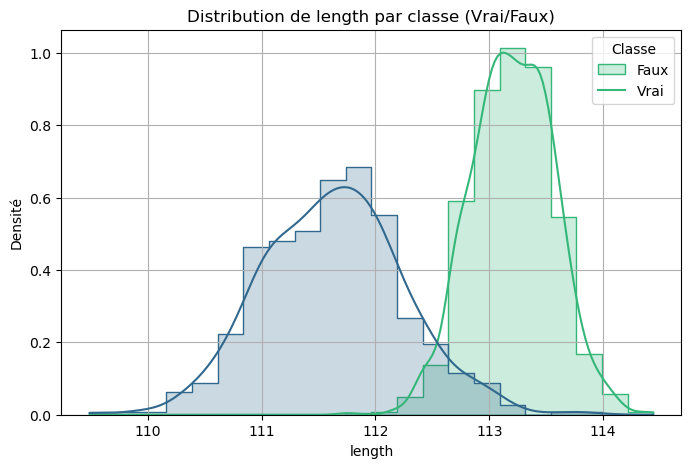

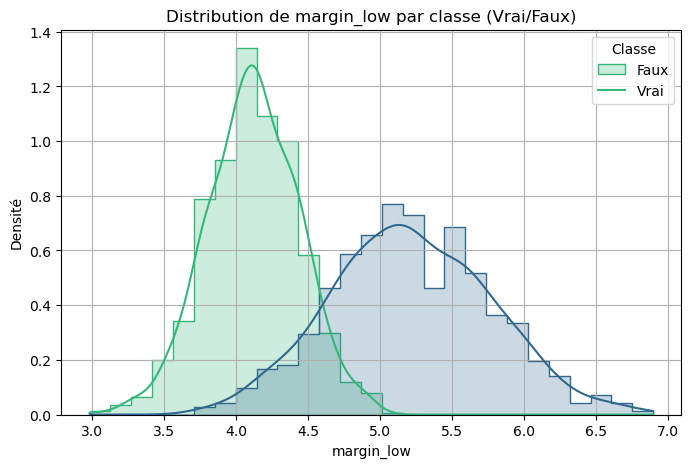

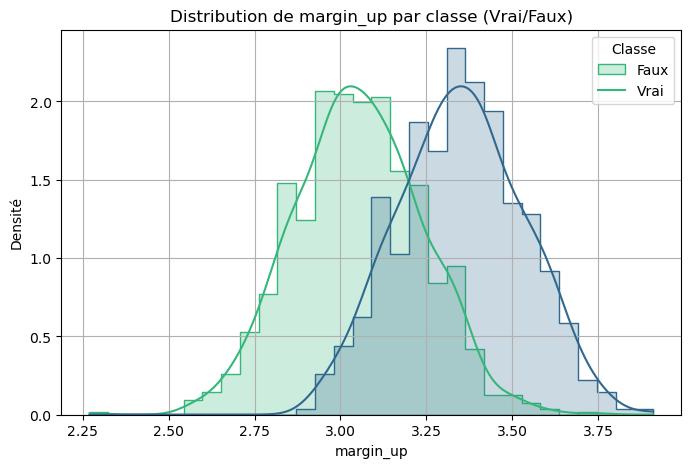

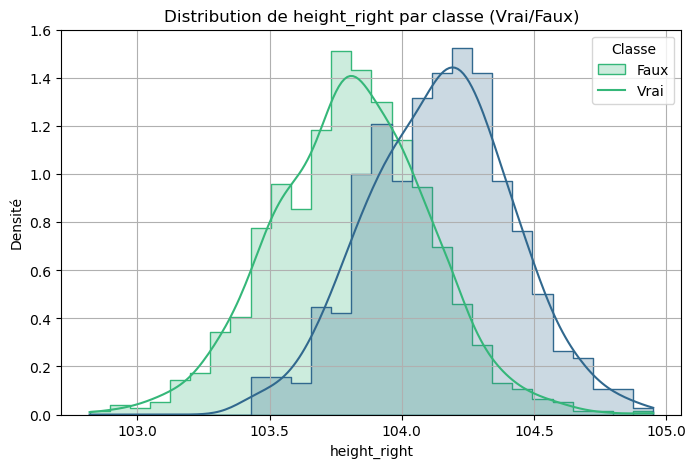

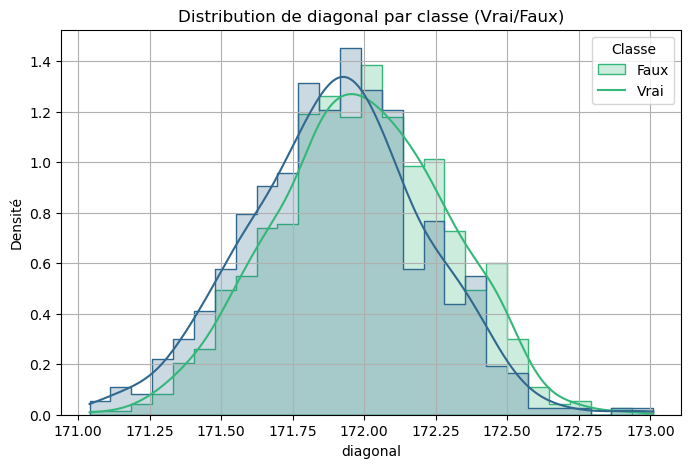

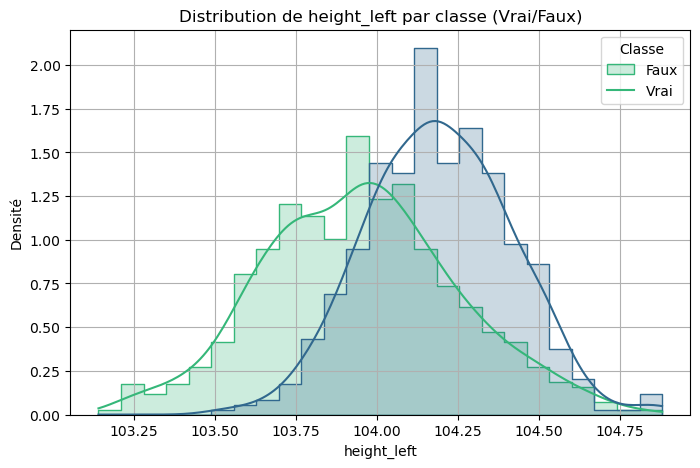

In [11]:
# Liste des variables à analyser
variables = ['length', 'margin_low', 'margin_up', 'height_right', 'diagonal', 'height_left']

# Générer un histogramme superposé pour chaque variable
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=var, hue='is_genuine', kde=True, element='step', stat='density', common_norm=False, palette='viridis')
    plt.title(f"Distribution de {var} par classe (Vrai/Faux)")
    plt.xlabel(var)
    plt.ylabel("Densité")
    plt.legend(title='Classe', labels=['Faux', 'Vrai'])  
    plt.grid(True)
    plt.show()


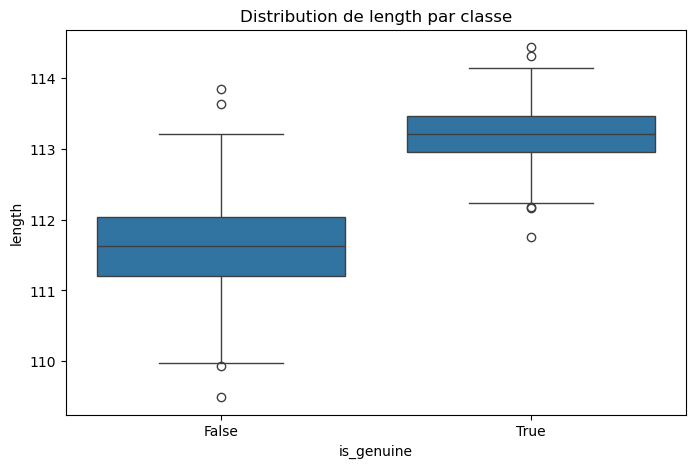

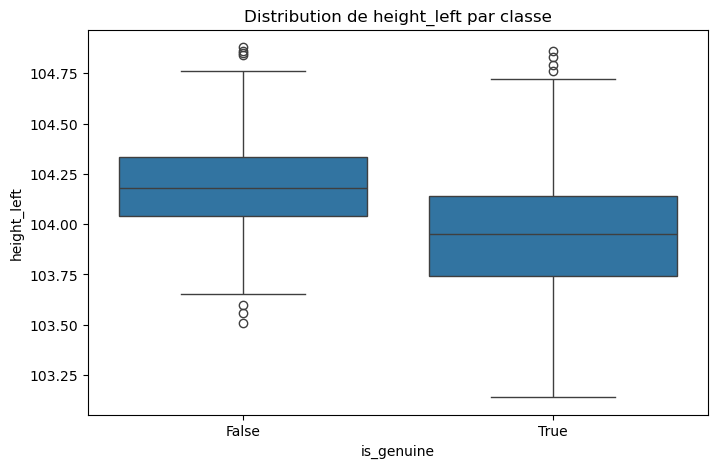

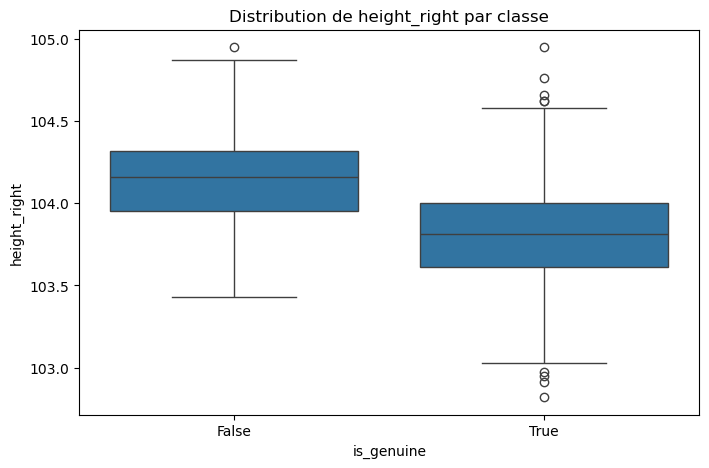

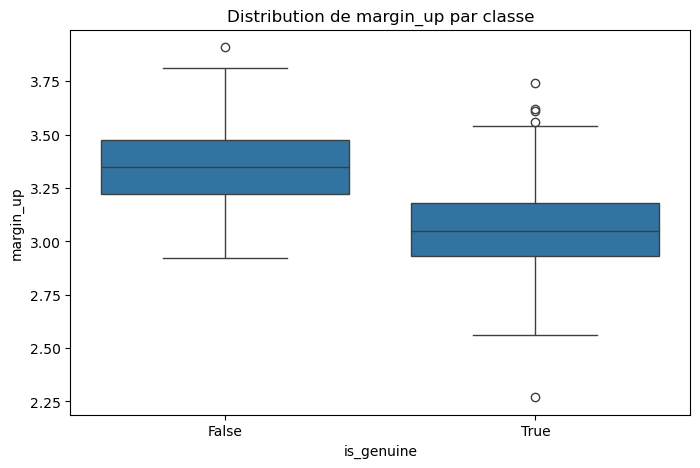

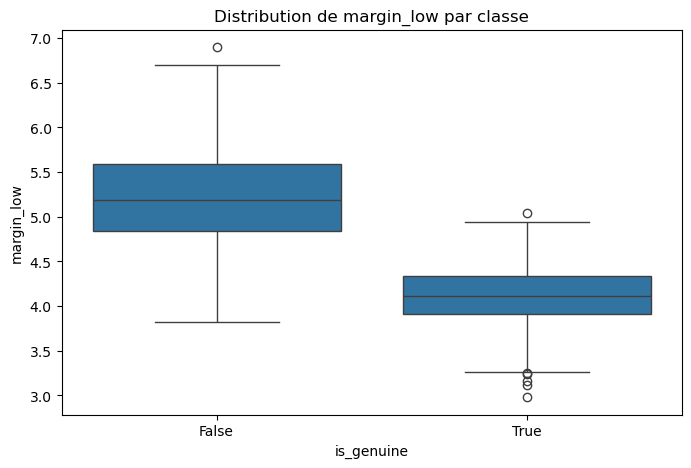

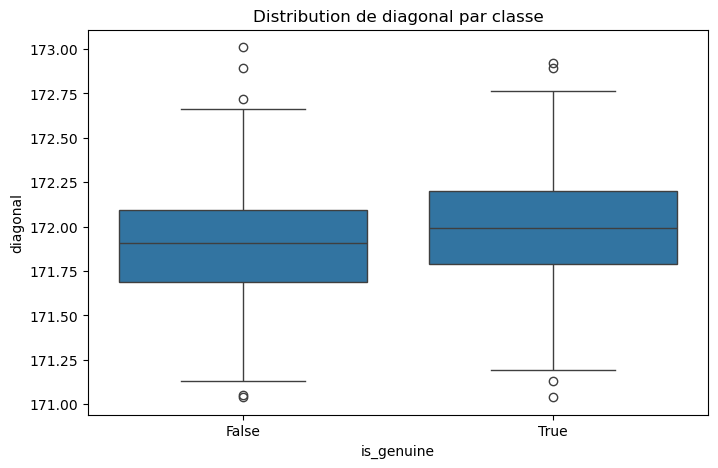

In [12]:
# Liste des variables géométriques
variables = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']

# Générer une boîte à moustaches pour chaque variable
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='is_genuine', y=var)
    plt.title(f"Distribution de {var} par classe")
    plt.xticks([0, 1], ['False', 'True'])  # Ajustez les labels si votre colonne cible est codée différemment
    plt.show()


<b><u>Analyse </u></b>
<div>
<b>Lenght :</b></div>
<ul>
<li>Vrais billets : Très homogènes (médiane ~113.3 mm, peu de variabilité).</li>
<li>Faux billets : Plus courts en moyenne (médiane ~111.7 mm), avec une variabilité accrue et plusieurs outliers.</li>
</ul>
<i>Implication : Une longueur < 112 mm est un indicateur fort de contrefaçon.</i>

<b>height_left :</b></div>
<ul>
<li>Vrais billets : Distribution serrée (médiane ~103.9 mm), quelques outliers hauts.</li>
<li>Faux billets : Légèrement plus hauts en moyenne (médiane ~104.2 mm), avec des outliers bas.</li>
</ul>
<i>Implication : Peu discriminante seule, mais à croiser avec height_right.</i>

<b>height_right :</b></div>
<ul>
<li>Vrais billets : Très stables (médiane ~103.9 mm).</li>
<li>Faux billets : Plus variables (médiane ~104.1 mm), avec des outliers hauts et bas.</li>
</ul>
<i>Implication : Une asymétrie entre height_left et height_right pourrait être un signal.</i>

<b>margin_up :</b></div>
<ul>
<li>Vrais billets : Marge plus faible (médiane ~3.0 mm) et stable.</li>
<li>Faux billets : Marge plus grande (médiane ~3.3 mm) et très variable (outliers à 4 mm).</li>
</ul>
<i>Implication : Une marge > 3.5 mm est suspicieuse.</i>


<b>margin_low :</b></div>
<ul>
<li>Vrais billets : Très homogènes (médiane ~4.2 mm).</li>
<li>Faux billets : Plus variables (médiane ~5.0 mm), avec des outliers hauts.</li>
</ul>
<i>Implication : Une marge > 5.5 mm est un indicateur fort de contrefaçon.</i>

<b>diagonal :</b></div>
<ul>
<li>Vrais billets : Très stables (médiane ~172.0 mm).</li>
<li>Faux billets : Plus variables (médiane ~171.8 mm), avec des outliers bas.</li>
</ul>
<i>Implication : Une diagonale < 171.5 mm est suspicieuse.</i>


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Matrice de corrélation</h3>

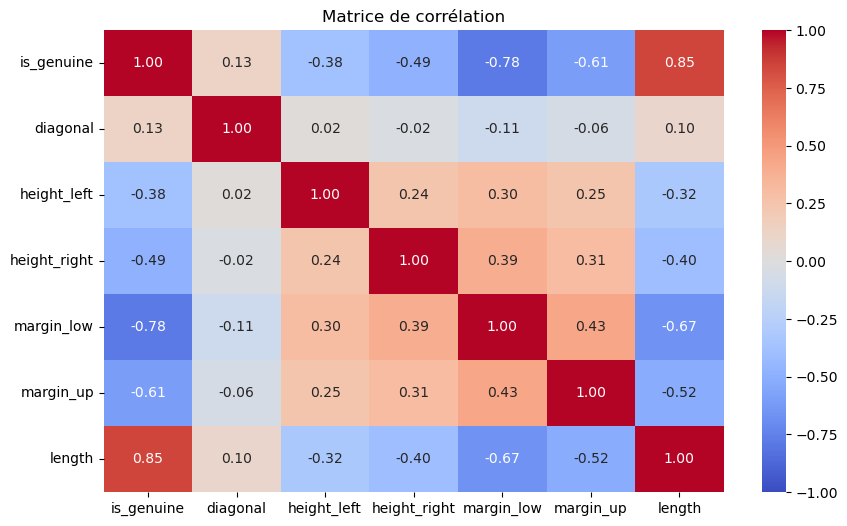

In [13]:
# Calculer la matrice de corrélation
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", center=0)
plt.title("Matrice de corrélation")
plt.show()




<div>Variables à privilégier :</div>

<ul>
<li>length : Très utile (corrélation de 0.85 avec is_genuine).</li>
<li>margin_low : Très utile (corrélation de -0.78 avec is_genuine).</li>
<li>margin_up : Utile (corrélation de -0.61 avec is_genuine).</li>
<li>diagonal : Peu utile, peut être supprimée</li>
<li>height_right : Modérément utile pour distinguer les vrais des faux billets.Peut apporter une information complémentaire, surtout en combinaison avec d'autres variables comme length et margin_low.</li>
<li>height_left : Peu utile seule, mais peut être conservée pour explorer des interactions avec d'autres variables.</li>
</ul>



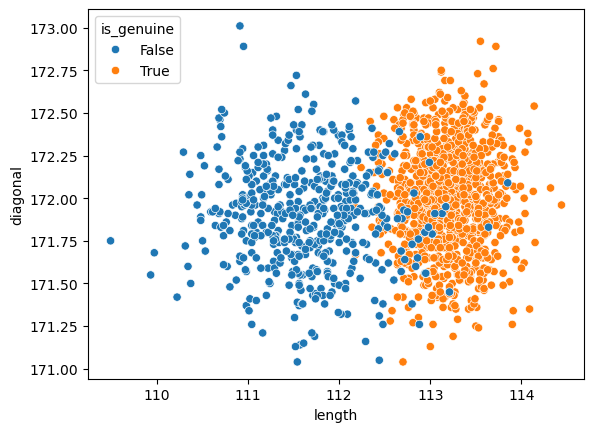

In [14]:
sns.scatterplot(data=df, x='length', y='diagonal', hue='is_genuine')
plt.show()


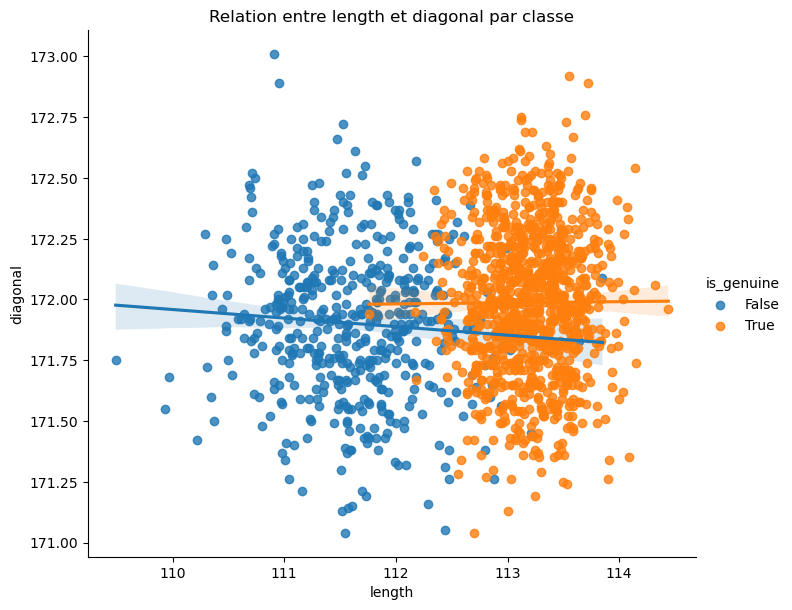

In [15]:
sns.lmplot(data=df, x='length', y='diagonal', hue='is_genuine', height=6, aspect=1.2)
plt.title("Relation entre length et diagonal par classe")
plt.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Nettoyage des données</h3>

In [16]:
# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna()
print("\nForme du jeu de données après suppression des NaN :", df.shape)


Valeurs manquantes par colonne :
is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Forme du jeu de données après suppression des NaN : (1463, 7)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Traitement des outliers pour les vrais billets</h3>

On ne supprime que les outliers des vrais billets, les faux pouvant correspondre à des caractéristiques réelles de contrefaçon

In [17]:
# Fonction pour détecter et supprimer les outliers (méthode de l'écart interquartile)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer uniquement aux vrais billets (is_genuine = 1)
df_true = df[df['is_genuine'] == 1]
df_true_clean = df_true.copy()

for column in ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']:
    df_true_clean = remove_outliers(df_true_clean, column)

# Conserver les faux billets intacts
df_false = df[df['is_genuine'] == 0]

# Réassembler les données
df_clean = pd.concat([df_true_clean, df_false])
print("\nForme du jeu de données après suppression des outliers pour les vrais billets :", df_clean.shape)



Forme du jeu de données après suppression des outliers pour les vrais billets : (1438, 7)


In [18]:
# Vérifier la répartition des classes
print("\nRépartition des classes après nettoyage :")
print(df_clean['is_genuine'].value_counts())



Répartition des classes après nettoyage :
is_genuine
True     946
False    492
Name: count, dtype: int64


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">ACP</h3>

In [19]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables (sans la cible)
X = df_clean.drop('is_genuine', axis=1)

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
from sklearn.decomposition import PCA

# Initialiser l'ACP (garder toutes les composantes pour analyser la variance)
pca = PCA()  
pca.fit(X_scaled)


# Variance expliquée par chaque composante
print("Variance expliquée par composante :", pca.explained_variance_ratio_)

# Variance cumulative
cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Variance cumulative :", cum_var)


Variance expliquée par composante : [0.43689831 0.17021734 0.13029741 0.1160246  0.09347044 0.0530919 ]
Variance cumulative : [0.43689831 0.60711565 0.73741305 0.85343765 0.9469081  1.        ]


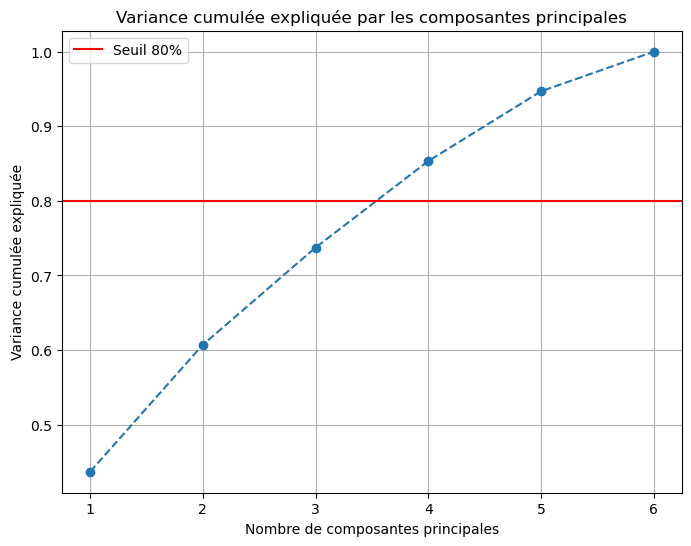

In [21]:
# Variance expliquée par composante
explained_variance = pca.explained_variance_ratio_
# Variance cumulative
cumulative_variance = np.cumsum(explained_variance)

# Tracer le graphique
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.title('Variance cumulée expliquée par les composantes principales')
plt.axhline(y=0.8, color='r', linestyle='-', label='Seuil 80%')
plt.xticks(range(1, len(cumulative_variance) + 1))  # Afficher 1, 2, 3, etc.
plt.grid(True)
plt.legend()
plt.show()



4 composantes principales peuvent expliquer plus de 80% de la variance cumulée

In [22]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
print("Variance expliquée par les 4 composantes :", pca.explained_variance_ratio_)
print("Variance cumulative :", np.cumsum(pca.explained_variance_ratio_))



Variance expliquée par les 4 composantes : [0.43689831 0.17021734 0.13029741 0.1160246 ]
Variance cumulative : [0.43689831 0.60711565 0.73741305 0.85343765]


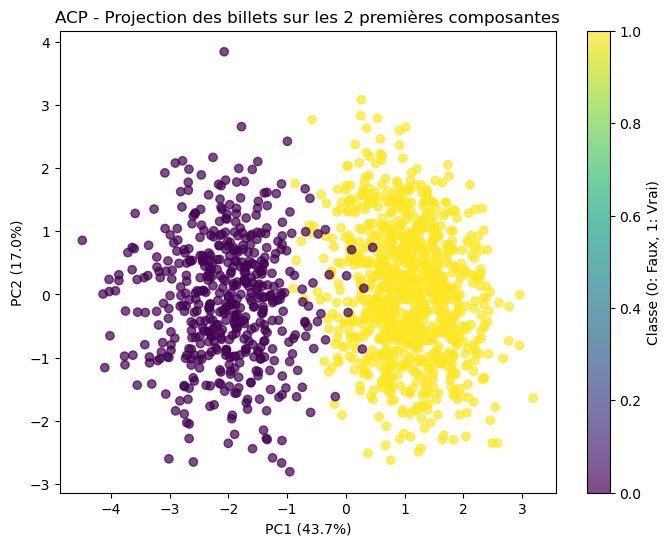

In [23]:
# Recréez y à partir de X (pour garantir l'alignement)
y = df_clean.loc[X.index, 'is_genuine']  # Utilise les mêmes indices que X

# Puis tracez le graphique
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.colorbar(label='Classe (0: Faux, 1: Vrai)')
plt.title("ACP - Projection des billets sur les 2 premières composantes")
plt.show()

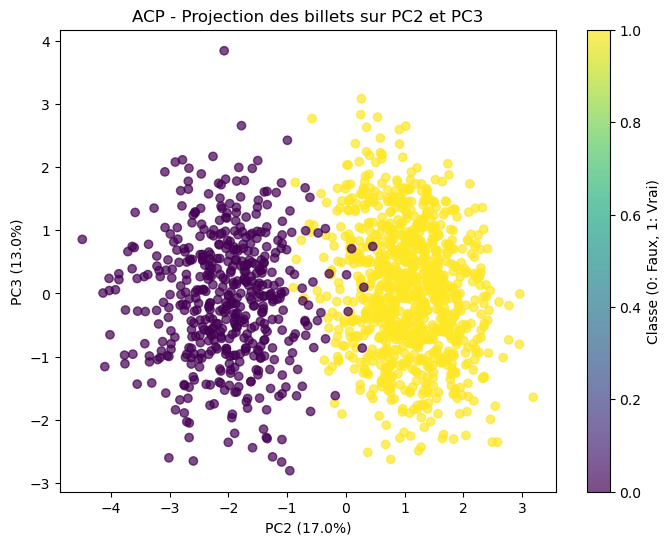

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.ylabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
plt.colorbar(label='Classe (0: Faux, 1: Vrai)')
plt.title("ACP - Projection des billets sur PC2 et PC3")
plt.show()

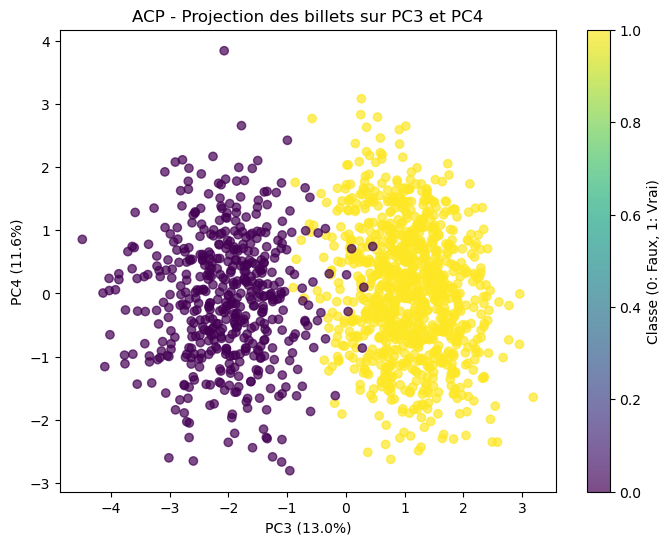

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
plt.ylabel(f'PC4 ({pca.explained_variance_ratio_[3]*100:.1f}%)')
plt.colorbar(label='Classe (0: Faux, 1: Vrai)')
plt.title("ACP - Projection des billets sur PC3 et PC4")
plt.show()

# 3) Prétraitement

Le but est de transformer tes données brutes (les valeurs mesurées des billets) en données que les algorithmes de Machine Learning peuvent comprendre efficacement.

D'abord, il faut séparer les variables explicatives et la cible :

X = les mesures du billet (longueur, hauteur, diagonales…)

y = l’étiquette (vrai ou faux)

➡️ Pourquoi ?
Parce que le modèle doit apprendre à prédire y en fonction de X.

In [26]:
# Séparer les features (X) et la cible (y)
X = df_clean.drop('is_genuine', axis=1)
y = df_clean['is_genuine']

Autre point important : on entraîne toujours le modèle sur un morceau des données, et on teste sur un autre qu’il n’a jamais vu.

➡️ Pourquoi ?
Pour éviter le sur-apprentissage (le modèle apprend par cœur sans savoir généraliser).

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Diviser les données (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nTaille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (1150, 6)
Taille de l'ensemble de test : (288, 6)


Enfin, on met toutes les variables sur la même échelle (moyenne = 0, écart-type = 1).

➡️ Pourquoi ?
Parce que certains modèles, comme le KNN ou la Régression Logistique, sont sensibles aux différences d’échelle.
Sans standardisation, la variable la plus grande numériquement prend trop d’importance.

In [28]:
# Standardiser les features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Afficher les premières lignes après standardisation
print("\nDonnées standardisées (5 premières lignes) :")
print(X_scaled[:5])


Données standardisées (5 premières lignes) :
[[-1.65243609 -2.25429216 -0.82273927 -1.08898289 -0.71291918  0.4840169 ]
 [ 2.41629155  1.50966225 -1.32513012 -0.1399178  -0.93051433  0.5640214 ]
 [-1.98322696 -0.40592169  0.05644473 -1.31495077 -0.62588112  0.9640439 ]
 [-0.75930076  0.83752753 -1.45072784 -0.68224071  1.41951328 -0.14458989]
 [ 0.69617905 -0.9772362   0.49603673 -0.10978875 -0.8869953   0.16399889]]


# 4) Modélisation

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">REGRESSION LOGISTIQUE</h2>
</div>

<b>Paramètres ajustables :</b></div>
<ul>
<li>Penalty | Type de régularisation ('l1', 'l2', 'elasticnet', None) | 'l2' (Ridge) pour éviter le sur-apprentissage.</li>
<li> C | Inverse de la force de régularisation (plus petit = plus de régularisation) | A tester 0.1,1,10</li>
<li> solver | Algorithme d'optimisation ('newton-cg', 'lbfgs', 'liblinear', etc.) | 'liblinear' pour les petits jeux de données</li>
<li>Max_iter | Nombre maximum d'itérations pour la convergence | Augmenté à 1000 pour garantir la convergence</li>
<li>random_state | Graine pour la reproductibilité | Fixez à 42 pour des résultats reproductibles</li>
</ul>

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialiser le modèle avec des paramètres adaptés
model = LogisticRegression(
    penalty='l2',       # Régularisation L2 (Ridge)
    C=1.0,              # Force de régularisation (à ajuster)
    solver='liblinear', # Algorithme d'optimisation pour petits datasets
    max_iter=1000,      # Nombre maximum d'itérations
    random_state=42     # Reproductibilité
)


In [30]:
# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire les classes pour X_test
y_pred = model.predict(X_test)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Evaluation des performances</h3>

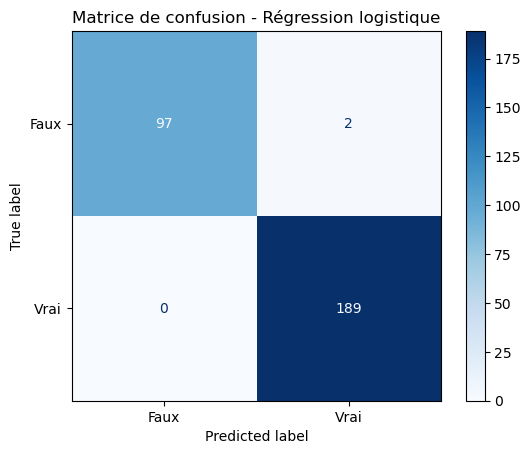

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - Régression logistique")
plt.show()

In [32]:
# Rapport de classification (précision, rappel, f1-score)
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))

              precision    recall  f1-score   support

        Faux       1.00      0.98      0.99        99
        Vrai       0.99      1.00      0.99       189

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



<div>
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Interprétation des coefficients</h3>

In [33]:
# Définir les noms des colonnes utilisées dans le modèle
features = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']


# Afficher les coefficients
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


length: 0.2560
height_left: -0.3485
height_right: -0.8061
margin_up: -2.6802
margin_low: -1.6997
diagonal: 3.6647


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Relance du modèle sans la diagonale</h3>

In [34]:
features = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low']
X = df_clean[features]
y = df_clean['is_genuine']



In [35]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

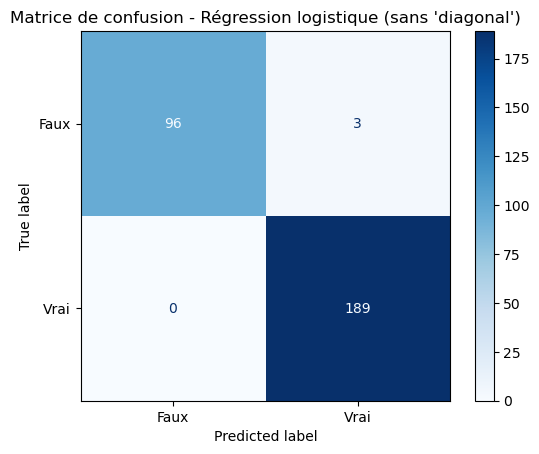

In [37]:
# Prédiction
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - Régression logistique (sans 'diagonal')")
plt.show()


In [38]:
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))


              precision    recall  f1-score   support

        Faux       1.00      0.97      0.98        99
        Vrai       0.98      1.00      0.99       189

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.99       288
weighted avg       0.99      0.99      0.99       288



In [39]:
print("\nCoefficients du modèle (sans 'diagonal') :")
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")



Coefficients du modèle (sans 'diagonal') :
length: 3.6810
height_left: -0.3370
height_right: -0.7790
margin_up: -1.6947
margin_low: -2.7629


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">KNN</h2>
</div>

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Toutes les variables géométriques + la cible
features = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']
X = df_clean[features]
y = df_clean['is_genuine']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("\nTaille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (1150, 6)
Taille de l'ensemble de test : (288, 6)


In [41]:
# Initialiser avec k=5 (valeur par défaut)
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)


KNeighborsClassifier()

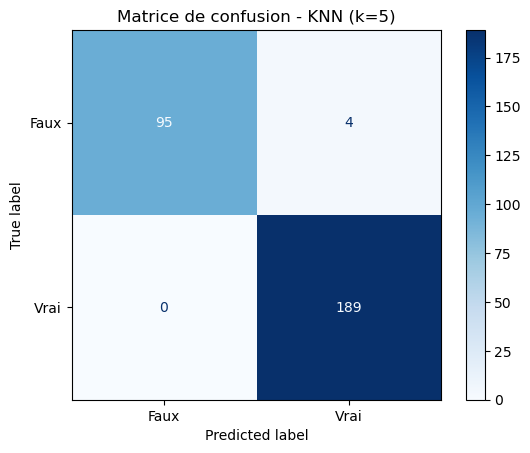

In [42]:
y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - KNN (k=5)")
plt.show()

In [43]:
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))

              precision    recall  f1-score   support

        Faux       1.00      0.96      0.98        99
        Vrai       0.98      1.00      0.99       189

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.98       288
weighted avg       0.99      0.99      0.99       288



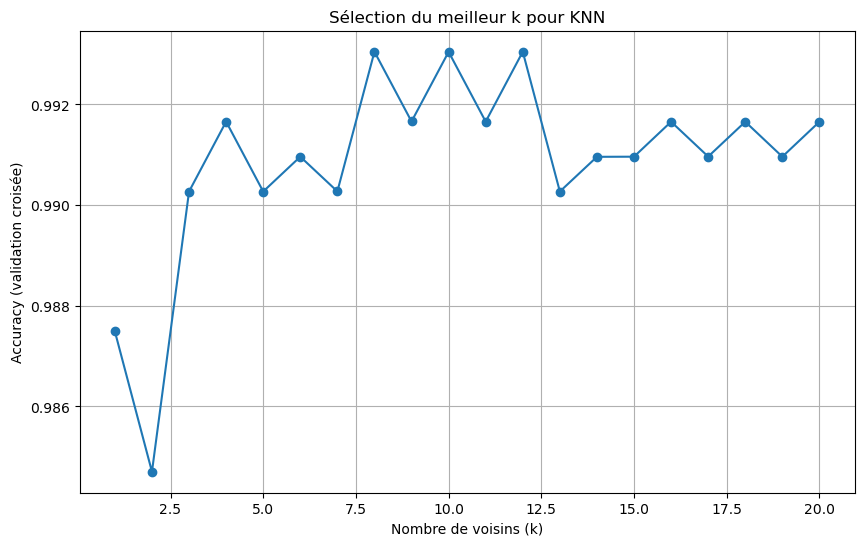


Meilleur k : 8 (Accuracy = 0.9930)


In [44]:
from sklearn.model_selection import cross_val_score

# Tester des valeurs de k de 1 à 20
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Accuracy (validation croisée)')
plt.title("Sélection du meilleur k pour KNN")
plt.grid()
plt.show()

# Meilleur k
best_k = k_values[np.argmax(cv_scores)]
print(f"\nMeilleur k : {best_k} (Accuracy = {cv_scores[np.argmax(cv_scores)]:.4f})")

In [45]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)
y_pred = best_knn_model.predict(X_test)
print("\nRapport de classification avec k =", best_k)
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))



Rapport de classification avec k = 8
              precision    recall  f1-score   support

        Faux       1.00      0.97      0.98        99
        Vrai       0.98      1.00      0.99       189

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.99       288
weighted avg       0.99      0.99      0.99       288



C:\Users\1340MAD\AppData\Local\Temp\ipykernel_16652\2315174890.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


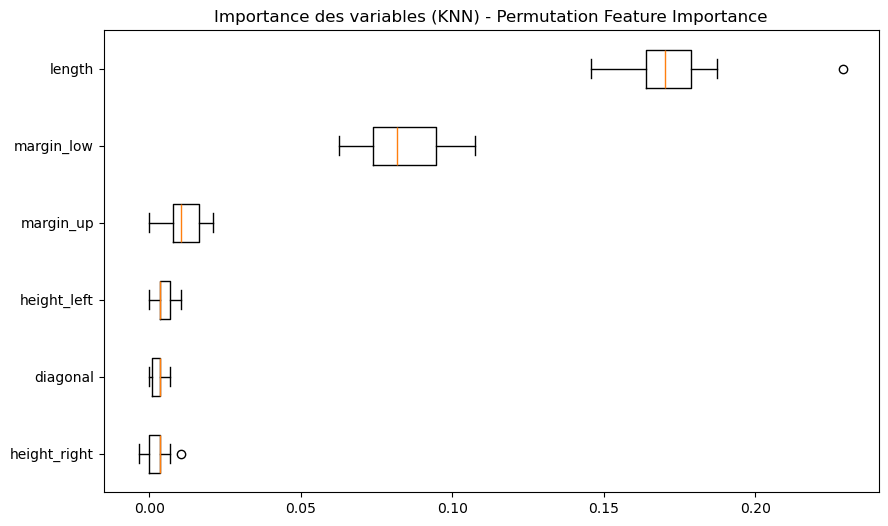

In [46]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_knn_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Afficher l'importance des variables
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Importance des variables (KNN) - Permutation Feature Importance")
plt.show()


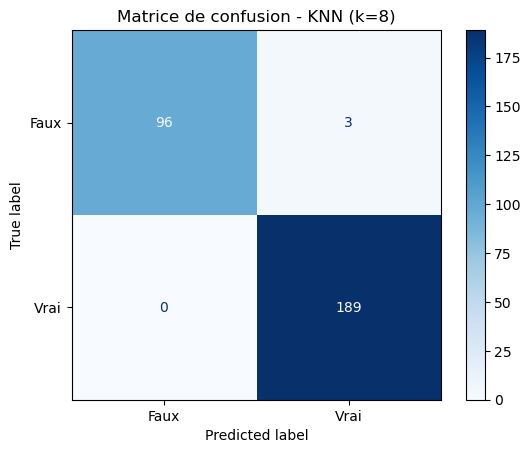

In [47]:
y_pred = best_knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - KNN (k=8)")
plt.show()

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">RANDOM FOREST</h2>
</div>

In [48]:
features = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']
X = df_clean[features]
y = df_clean['is_genuine']


In [49]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (1150, 6)
Taille de l'ensemble de test : (288, 6)


In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,       # Nombre d'arbres
    max_depth=10,           # Profondeur maximale des arbres
    min_samples_split=5,    # Éviter le sur-apprentissage
    random_state=42,        # Reproductibilité
    n_jobs=-1               # Utiliser tous les cœurs CPU
)



In [52]:
#entrainement du modèle
rf_model.fit(X_train, y_train)

#prédiction
y_pred = rf_model.predict(X_test)


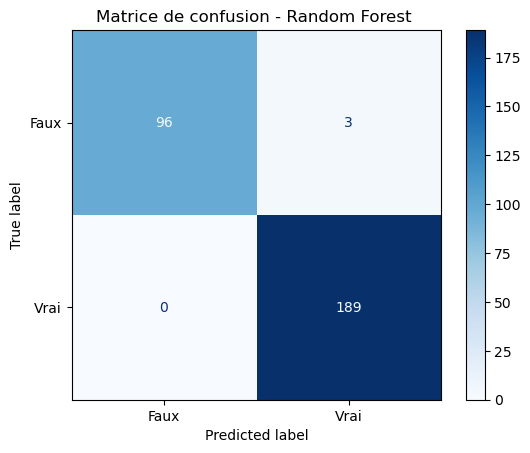

In [53]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - Random Forest ")
plt.show()


In [54]:
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))


              precision    recall  f1-score   support

        Faux       1.00      0.97      0.98        99
        Vrai       0.98      1.00      0.99       189

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.99       288
weighted avg       0.99      0.99      0.99       288



In [55]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure accuracy :", grid_search.best_score_)


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Meilleure accuracy : 0.9930434782608696


In [56]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
print("\nRapport de classification avec les meilleurs hyperparamètres :")
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))



Rapport de classification avec les meilleurs hyperparamètres :
              precision    recall  f1-score   support

        Faux       1.00      0.97      0.98        99
        Vrai       0.98      1.00      0.99       189

    accuracy                           0.99       288
   macro avg       0.99      0.98      0.99       288
weighted avg       0.99      0.99      0.99       288



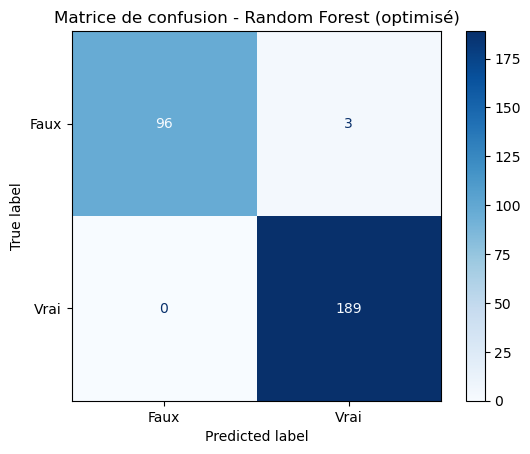

In [57]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - Random Forest (optimisé)")
plt.show()


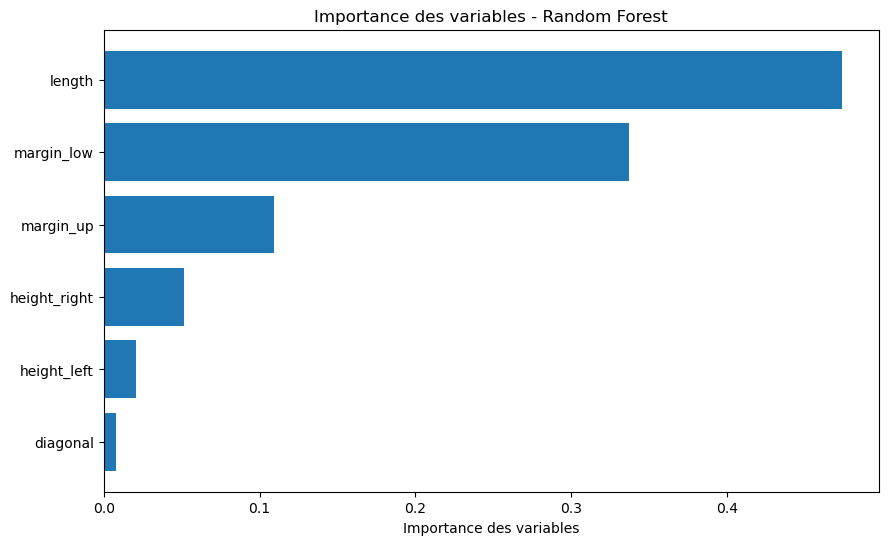

In [58]:
# Récupérer l'importance des variables
importances = best_rf_model.feature_importances_

# Trier les variables par importance
sorted_idx = importances.argsort()

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel('Importance des variables')
plt.title("Importance des variables - Random Forest")
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">K-MEANS</h2>
</div>

In [59]:
from sklearn.cluster import KMeans

# Attention ! Cet algo est très différents de ceux utilisés précédemment.
# Peux-tu voir les différences ?
# Du coup, cet algo est-il utile (voir pertinent) pour cette étude ?

In [60]:
features = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']
X = df[features]

# Standardisation (CRITIQUE pour K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


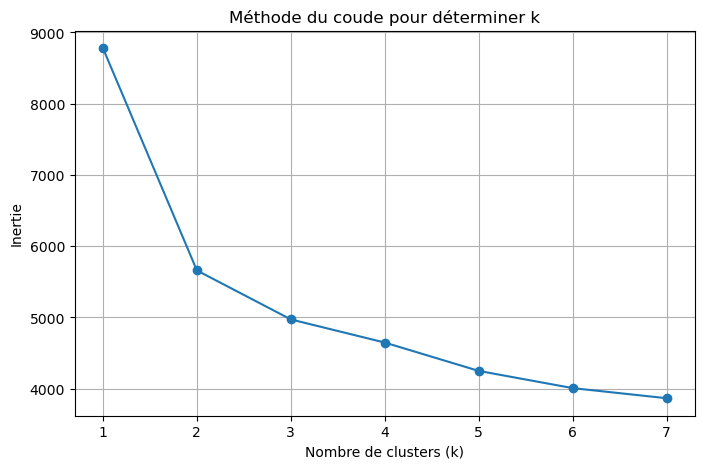

In [61]:
from sklearn.cluster import KMeans

# Calculer l'inertie pour différents nombres de clusters
inertias = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title("Méthode du coude pour déterminer k")
plt.grid()
plt.show()


In [62]:
# le coude est à k=2
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=2, n_init=10, random_state=42)

In [63]:
df['cluster'] = kmeans.labels_

print(df.groupby('cluster').mean())

         is_genuine   diagonal  height_left  height_right  margin_low  \
cluster                                                                 
0          0.018443  171.90002   104.198770    104.150328    5.222316   
1          0.986667  171.98881   103.947528    103.806933    4.117415   

         margin_up      length  
cluster                         
0         3.353422  111.630984  
1         3.052810  113.197179  


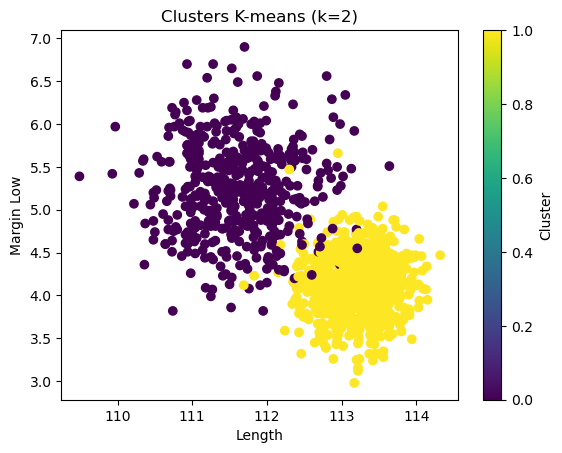

In [64]:
plt.scatter(df['length'], df['margin_low'], c=df['cluster'], cmap='viridis')
plt.xlabel('Length')
plt.ylabel('Margin Low')
plt.title("Clusters K-means (k=2)")
plt.colorbar(label='Cluster')
plt.show()


In [65]:
pd.crosstab(df['cluster'], df['is_genuine'])


is_genuine,False,True
cluster,,
0,479,9
1,13,962


In [66]:
from sklearn.metrics import adjusted_rand_score

# Score de Rand ajusté (entre 0 et 1, 1 = correspondance parfaite)
score = adjusted_rand_score(df['is_genuine'], df['cluster'])
print(f"Adjusted Rand Index: {score:.3f}")


Adjusted Rand Index: 0.940


In [67]:
distances = kmeans.transform(X_scaled).min(axis=1)
df['distance'] = distances
df[df['distance'] > 3].sort_values('distance', ascending=False)  # Billets atypiques


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster,distance
0,True,171.81,104.86,104.95,4.52,2.89,112.83,0,4.250661
1277,False,173.01,104.59,104.31,5.04,3.05,110.91,0,4.200006
1022,False,172.89,104.03,104.03,6.03,3.00,110.95,0,3.922949
664,True,172.05,103.70,103.75,5.04,2.27,113.55,1,3.780991
965,True,171.42,104.79,104.16,3.45,3.16,112.64,1,3.768682
...,...,...,...,...,...,...,...,...,...
387,True,172.37,104.19,104.58,4.25,2.82,112.88,1,3.014742
1142,False,171.04,104.23,104.22,4.87,3.56,111.54,0,3.013215
292,True,172.09,103.14,103.81,4.88,3.01,113.69,1,3.008844
34,True,172.29,103.61,104.44,4.54,2.69,113.48,1,3.004687


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">PREPARATION DU MODELE</h2>
</div>

In [68]:
features = ['length', 'height_right', 'margin_up', 'margin_low']
X = df[features]
y = df['is_genuine']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [69]:
print("\nTaille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (1170, 4)
Taille de l'ensemble de test : (293, 4)


In [70]:
# Entraînement de K-means (k=2 pour vrais/faux)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)  # Utilisez uniquement X_train pour éviter le data leakage

# Ajout des clusters aux données d'entraînement et de test
X_train_with_clusters = np.hstack([X_train, kmeans.predict(X_train).reshape(-1, 1)])
X_test_with_clusters = np.hstack([X_test, kmeans.predict(X_test).reshape(-1, 1)])


In [71]:
from sklearn.ensemble import VotingClassifier

# Modèles individuels
lr_model = LogisticRegression(C=0.1, solver='liblinear', random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=8)

# Voting Classifier avec voting='soft'
voting_model = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('rf', rf_model),
        ('knn', knn_model)
    ],
    voting='soft'  # Utilise les probabilités pour voter
)

# Entraînement du modèle
voting_model.fit(X_train_with_clusters, y_train)



VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

              precision    recall  f1-score   support

        Faux       0.97      1.00      0.99        99
        Vrai       1.00      0.98      0.99       194

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



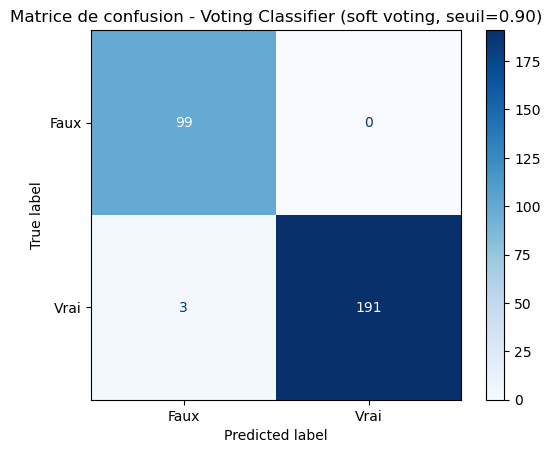

In [72]:
# Prédiction des probabilités
y_pred_proba = voting_model.predict_proba(X_test_with_clusters)[:, 1]  # Probabilités d'être vrai

# Application d'un seuil strict 
y_pred = (y_pred_proba >= 0.90).astype(int)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=['Faux', 'Vrai']))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Faux', 'Vrai']).plot(cmap='Blues')
plt.title("Matrice de confusion - Voting Classifier (soft voting, seuil=0.90)")
plt.show()


In [73]:
# Convertir X_test en DataFrame (en utilisant les noms des colonnes originales)
X_test_df = pd.DataFrame(X_test, columns=features)  

# Ajouter les prédictions et la vraie classe
results = X_test_df.copy()
results['is_genuine'] = y_test.values
results['predicted_class'] = y_pred
results['probability'] = y_pred_proba

# Afficher les premières lignes
results



,length,height_right,margin_up,margin_low,is_genuine,predicted_class,probability
0,-1.540522,-0.374846,0.505289,0.684211,False,0,0.008305
1,-1.311407,2.710904,0.634942,0.563654,False,0,0.002550
2,0.464236,0.921169,-0.661588,-0.747405,True,1,0.989671
3,-0.979190,0.705167,1.067119,1.980201,False,0,0.001119
4,-1.013557,0.736024,0.980684,1.452763,False,0,0.009170
...,...,...,...,...,...,...,...
288,-0.979190,0.149732,-0.056540,1.874713,False,0,0.004699
289,0.716263,0.921169,0.116330,-0.491221,True,1,0.980099
290,0.578794,0.489164,-0.402282,0.021147,True,1,0.974332
291,-2.204956,-0.714278,-0.315846,0.397888,False,0,0.013993


In [74]:
# 3. Filtrer les billets prédits comme faux
faux_predits = results[results['predicted_class'] == 0]
print(f"\nNombre de billets prédits comme faux : {len(faux_predits)}")
print(faux_predits.head())

# 4. Filtrer les billets prédits comme vrais
vrais_predits = results[results['predicted_class'] == 1]
print(f"\nNombre de billets prédits comme vrais : {len(vrais_predits)}")
print(vrais_predits.head())

# 5. Identifier les erreurs
faux_positifs = results[(results['predicted_class'] == 1) & (results['is_genuine'] == 0)]
print(f"\nNombre de faux positifs : {len(faux_positifs)}")
print(faux_positifs)

faux_negatifs = results[(results['predicted_class'] == 0) & (results['is_genuine'] == 1)]
print(f"\nNombre de faux négatifs : {len(faux_negatifs)}")
print(faux_negatifs)



Nombre de billets prédits comme faux : 102
     length  height_right  margin_up  margin_low  is_genuine  predicted_class  \
0 -1.540522     -0.374846   0.505289    0.684211       False                0   
1 -1.311407      2.710904   0.634942    0.563654       False                0   
3 -0.979190      0.705167   1.067119    1.980201       False                0   
4 -1.013557      0.736024   0.980684    1.452763       False                0   
6 -1.563434      1.692606   2.017908    0.488306       False                0   

   probability  
0     0.008305  
1     0.002550  
3     0.001119  
4     0.009170  
6     0.000944  

Nombre de billets prédits comme vrais : 191
      length  height_right  margin_up  margin_low  is_genuine  \
2   0.464236      0.921169  -0.661588   -0.747405        True   
5   0.636073     -2.226296   0.851031    0.096495        True   
7   0.452781      0.211447  -0.920894   -0.626848        True   
9  -0.246021     -1.393143  -0.186193   -1.757071        True 

In [75]:
# Filtrer les faux positifs (faux billets prédits comme vrais)
faux_positifs = results[(results['is_genuine'] == 0) & (results['predicted_class'] == 1)]

# Afficher la liste complète avec leurs caractéristiques
print("=== Liste des FAUX billets prédits comme VRAIS (faux positifs) ===")
print(f"Nombre : {len(faux_positifs)}")
print(faux_positifs[['length', 'margin_low', 'margin_up', 'height_right', 'probability']].to_string(index=False))


=== Liste des FAUX billets prédits comme VRAIS (faux positifs) ===
Nombre : 0
Empty DataFrame
Columns: [length, margin_low, margin_up, height_right, probability]
Index: []


In [76]:
# Filtrer les faux négatifs (vrais billets prédits comme faux)
vrais_faux = results[(results['is_genuine'] == 1) & (results['predicted_class'] == 0)]

# Afficher la liste complète avec leurs caractéristiques
print("\n=== Liste des VRAIS billets prédits comme FAUX (faux négatifs) ===")
print(f"Nombre : {len(vrais_faux)}")
print(vrais_faux[['length', 'margin_low', 'margin_up', 'height_right', 'probability']].to_string(index=False))



=== Liste des VRAIS billets prédits comme FAUX (faux négatifs) ===
Nombre : 3
   length  margin_low  margin_up  height_right  probability
-0.005450   -0.099410   0.591725      1.075456     0.372635
-0.372034   -0.491221   0.202766     -0.683421     0.768772
 0.063285    0.277331   0.245983      0.489164     0.847649


# Sélection du meilleur modèle

Mais alors, quel est le meilleur modèle pour résoudre ce problème ?

Pour répondre à cette question, il vous faut bien comprendre l'intérêt de chacune des métriques d'évaluation qui existent pour ce type de problème.

Vous me voyez venir... 😎 : StatQuest !!! 🤩
* [Machine Learning Fundamentals: Sensitivity and Specificity
](https://youtu.be/vP06aMoz4v8)
* [Machine Learning Fundamentals: The Confusion Matrix](https://youtu.be/Kdsp6soqA7o)
* [ROC and AUC, Clearly Explained!](https://youtu.be/4jRBRDbJemM)

Vous avez aussi des petits modules sympathiques sur Sklearn qui vous machent grandement le travail:
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Confusion Matrix Display](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)
* [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

A vous de jouer ! 🚀

# Sauvegarde du meilleur modèle

**_ATTENTION_** :
```
Sauvegarder un modèle implique de sauvegarder aussi les étapes de préprocessing des données.
Dans votre cas, vous devez donc inclure, à minima, votre StandardScaler.
```
Voir [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) pour plus d'infos.

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import joblib
from sklearn.impute import SimpleImputer

# Classe personnalisée pour ajouter les clusters comme feature
class ClusterAdder(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def transform(self, X):
        clusters = self.kmeans.predict(X)
        return np.hstack([X, clusters.reshape(-1, 1)])

# Charger les données
df = pd.read_csv('data/billets.csv', sep=";")
df = df.dropna()

features = ['length', 'height_right', 'margin_up', 'margin_low']
X = df[features]
y = df['is_genuine']

# Diviser les données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Définir et entraîner le pipeline
pipeline = make_pipeline(
    StandardScaler(),
    ClusterAdder(n_clusters=2),
    VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(C=0.1, solver='liblinear', random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
            ('knn', KNeighborsClassifier(n_neighbors=8))
        ],
        voting='soft'
    )
)

# Entraîner le pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('clusteradder', ClusterAdder()),
                ('votingclassifier',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(C=0.1,
                                                                  random_state=42,
                                                                  solver='liblinear')),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=200,
                                                                      random_state=42)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=8))],
                                  voting='soft'))])

In [78]:
# Sauvegarder le pipeline
joblib.dump(pipeline, 'Fabien_madelaine_appli.pkl')
print("Pipeline entraîné et enregistré avec succès.")

Pipeline entraîné et enregistré avec succès.


In [79]:
file_path = 'Fabien_madelaine_appli.pkl'
file_size = os.path.getsize(file_path)
print(f"Taille du fichier : {file_size} octets")

Taille du fichier : 783241 octets
